# SI140A Final Project - Phase Transition

Team members:

- Hengyu Ai (aihy2023\<at\>shanghaitech.edu.cn)
- Zebang He (hezb2023\<at\>shanghaitech.edu.cn)
- Sizhe Zhao (zhaoszh2023\<at\>shanghaitech.edu.cn)

## Part I: Percolation

### Problem Description

Using an $n \times n$ grid as a percolation model, we want to find the percolation threshold $p^*$, which is the probability that a site is open, such that the system percolates. A system percolates if there is a path of open sites from the top to the bottom of the grid.

### Solution

`numpy.random.choice` is used to generate random numbers. We first generate a random grid with a given probability $p$.

Then we use breadth-first search to find the connected components of the grid. If there is a connected component that connects the top and bottom of the grid (a full open site), we say the system percolates.

We pick $p$ from $0$ to $1$ and calculate the percolation probability by 5000 randomlly generated $n \times n$ grids. The percolation threshold is the smallest $p$ such that the percolation probability is larger than 0.5.

Threshold for n = 20: 0.5905094146728516


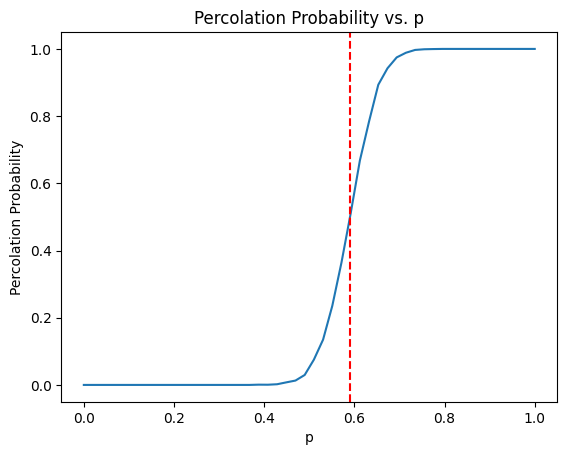

Threshold for n = 50: 0.5922451019287109


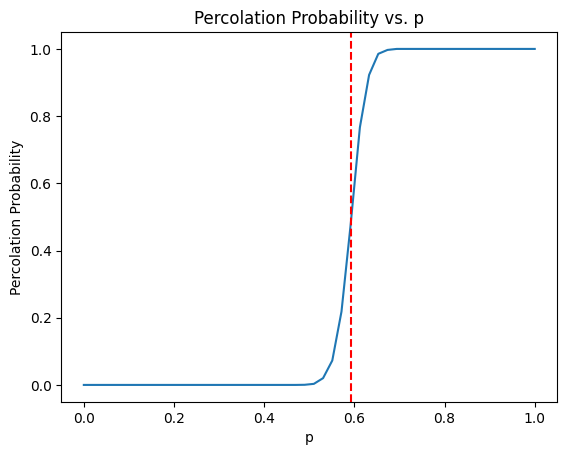

Threshold for n = 100: 0.5927896499633789


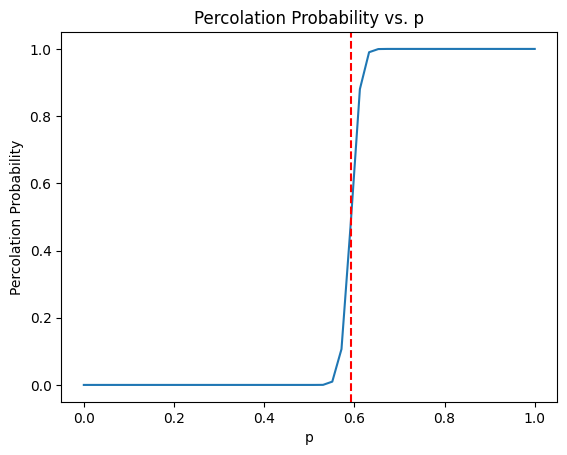

In [7]:
import numpy as np

"""
Generate a grid of size 'n' x 'n' with each cell having a probability 'p' of being open.
"""


def generate_grid(n: int, p: float) -> np.ndarray:
    return np.random.choice([0, 1], (n, n), p=[p, 1 - p])


"""
Use Breadth First Search to check if the grid percolates from the top to the bottom.
"""


def check_percolation(grid: np.ndarray) -> bool:
    q = []
    n = grid.shape[0]
    visited = np.zeros((n, n), dtype=bool)
    for i in range(n):
        if grid[i, 0] == 0:
            q.append((i, 0))
            visited[i, 0] = True
    while q:
        x, y = q.pop(0)
        if y == n - 1:
            return True
        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < n and grid[nx, ny] == 0 and not visited[nx, ny]:
                q.append((nx, ny))
                visited[nx, ny] = True
    return False


"""
Calculate the probability of percolation using Monte Carlo Simulation.
"""


def calc_percolation_probability(n: int, p: float, num_trials: int) -> float:
    count = 0
    for _ in range(num_trials):
        grid = generate_grid(n, p)
        if check_percolation(grid):
            count += 1
    return count / num_trials


def calc_threshold(n: int, num_trials: int) -> float:
    lo, hi = 0.0, 1.0
    while hi - lo > 1e-6:
        mid = (lo + hi) / 2
        if calc_percolation_probability(n, mid, num_trials) < 0.5:
            lo = mid
        else:
            hi = mid
    return lo


def plot_probability(n: int, num_trials: int, threshold: float) -> None:
    import matplotlib.pyplot as plt
    x = np.linspace(0, 1, 50)
    y = [calc_percolation_probability(n, p, num_trials) for p in x]
    plt.plot(x, y)
    plt.axvline(x=threshold, color='r', linestyle='--')
    plt.xlabel('p')
    plt.ylabel('Percolation Probability')
    plt.title('Percolation Probability vs. p')
    plt.show()


def main():
    num_trials = 5000
    for n in [20, 50, 100]:
        threshold = calc_threshold(n, num_trials)
        print(f"Threshold for n = {n}: {threshold}")
        plot_probability(n, num_trials, threshold)
    


main()

## Part II: Ising Model

### Problem Description

<!-- TODO: -->

### Solution

#### Task A

$ \begin{aligned}
P(\sigma_k=+1|\boldsymbol{\sigma}_{-k}) &= \frac{P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\})}{P(\boldsymbol{\sigma}_{-k})} \\
&= \frac{P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\})}{P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\} \cup \boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\})} \\
&= \frac{P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\})}{P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\}) + P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\})} \\
&= \frac{\pi_{\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\}}}{\pi_{\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\}} + \pi_{\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\}}} \\
&= \frac{e^{-\beta H(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\})}}{e^{-\beta H(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\})} + e^{-\beta H(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\})}} \\
&= \frac{e^{-\beta (- \sum_{v,w \not\sim k} \sigma_v \sigma_w - \sum_{v \sim k} \sigma_v)}}{e^{-\beta (- \sum_{v,w \not\sim k} \sigma_v \sigma_w - \sum_{v \sim k} \sigma_v)} + e^{-\beta (- \sum_{v,w \not\sim k} \sigma_v \sigma_w + \sum_{v \sim k} \sigma_v)}} \\
&= \frac{e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w + \sum_{v \sim k} \sigma_v)}}{e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w + \sum_{v \sim k} \sigma_v)} + e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w - \sum_{v \sim k} \sigma_v)}} \\
&= \frac{1}{1 + \frac{e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w - \sum_{v \sim k} \sigma_v)}}{e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w + \sum_{v \sim k} \sigma_v)}}} \\
&= \frac{1}{1 + e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w - \sum_{v \sim k} \sigma_v - \sum_{v,w \not\sim k} \sigma_v \sigma_w - \sum_{v \sim k} \sigma_v)}} \\
&= \frac{1}{1 + e^{-2\beta \sum_{v \sim k} \sigma_v}}
\end{aligned} $

$ \begin{aligned}
P(\sigma_k=-1|\boldsymbol{\sigma}_{-k}) &= \frac{P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\})}{P(\boldsymbol{\sigma}_{-k})} \\
&= \frac{P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\})}{P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\} \cup \boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\})} \\
&= \frac{P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\})}{P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\}) + P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\})} \\
&= \frac{\pi_{\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\}}}{\pi_{\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\}} + \pi_{\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\}}} \\
&= \frac{e^{-\beta H(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\})}}{e^{-\beta H(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\})} + e^{-\beta H(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\})}} \\
&= \frac{e^{-\beta (- \sum_{v,w \not\sim k} \sigma_v \sigma_w + \sum_{v \sim k} \sigma_v)}}{e^{-\beta (- \sum_{v,w \not\sim k} \sigma_v \sigma_w - \sum_{v \sim k} \sigma_v)} + e^{-\beta (- \sum_{v,w \not\sim k} \sigma_v \sigma_w + \sum_{v \sim k} \sigma_v)}} \\
&= \frac{e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w - \sum_{v \sim k} \sigma_v)}}{e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w + \sum_{v \sim k} \sigma_v)} + e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w - \sum_{v \sim k} \sigma_v)}} \\
&= \frac{1}{1 + \frac{e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w + \sum_{v \sim k} \sigma_v)}}{e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w - \sum_{v \sim k} \sigma_v)}}} \\
&= \frac{1}{1 + e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w + \sum_{v \sim k} \sigma_v - \sum_{v,w \not\sim k} \sigma_v \sigma_w + \sum_{v \sim k} \sigma_v)}} \\
&= \frac{1}{1 + e^{2\beta \sum_{v \sim k} \sigma_v}}
\end{aligned} $

#### Task B & C

<!-- TODO: -->

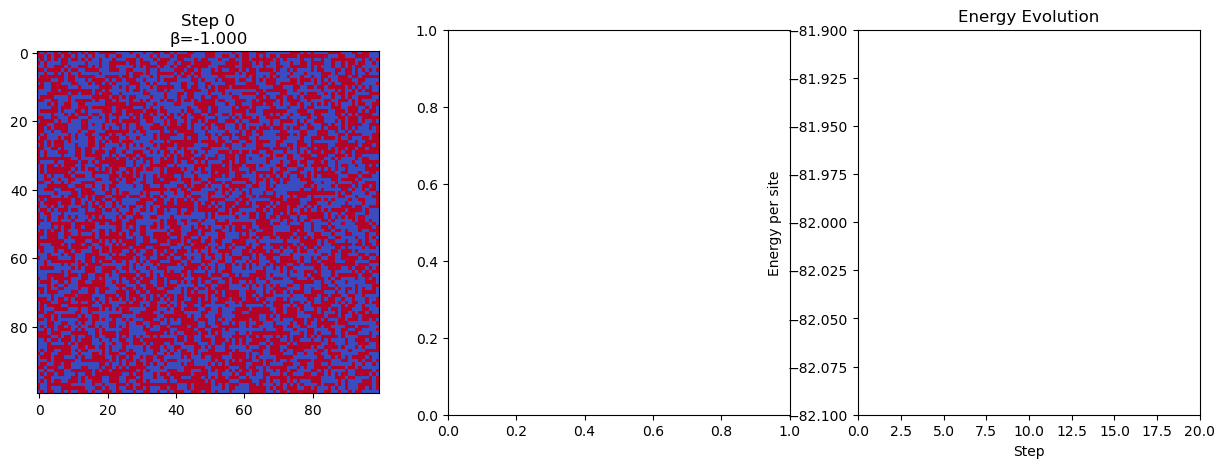

In [10]:
import numpy as np
import matplotlib.pyplot as plt


class IsingModel:
    def __init__(self, n, beta):
        self.n = n
        self.beta = beta
        self.lattice = np.random.choice([-1, 1], size=(n, n))

    def get_energy_change(self, i, j):
        # TODO: is this correct?
        spin = self.lattice[i, j]
        neighbors_sum = 0

        if i - 1 >= 0:
            neighbors_sum += self.lattice[i - 1, j]
        if i + 1 < self.n:
            neighbors_sum += self.lattice[i + 1, j]
        if j - 1 >= 0:
            neighbors_sum += self.lattice[i, j - 1]
        if j + 1 < self.n:
            neighbors_sum += self.lattice[i, j + 1]

        return 2 * spin * neighbors_sum

    def calculate_total_energy(self):
        energy = 0
        for i in range(self.n):
            for j in range(self.n):
                spin = self.lattice[i, j]
                neighbors_sum = 0

                if i - 1 >= 0:
                    neighbors_sum += self.lattice[i - 1, j]
                if i + 1 < self.n:
                    neighbors_sum += self.lattice[i + 1, j]
                if j - 1 >= 0:
                    neighbors_sum += self.lattice[i, j - 1]
                if j + 1 < self.n:
                    neighbors_sum += self.lattice[i, j + 1]

                energy += spin * neighbors_sum

        return -energy / 2

    def simulate(self, steps):
        energies = []

        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        (eng_line,) = axes[2].plot([], [])

        axes[2].set_xlabel("Step")
        axes[2].set_ylabel("Energy per site")
        axes[2].set_title("Energy Evolution")

        for step in range(steps):
            energy = self.calculate_total_energy()

            energies.append(energy)

            axes[0].clear()
            axes[0].imshow(self.lattice, cmap="coolwarm")
            axes[0].set_title(f"Step {step}\nβ={self.beta:.3f}")

            eng_line.set_data(range(len(energies)), energies)
            axes[2].set_xlim(0, steps)
            if step == 0:
                axes[2].set_ylim(min(energies) - 0.1, max(energies) + 0.1)

            plt.pause(0.1)

IsingModel(100, -1).simulate(20)
